In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from astroML.correlation import bootstrap_two_point_angular

In [2]:
#This cell will convert the txt to csv
datContent = [i.strip().split() for i in open("BCS05hr_reduced.txt").readlines()]
with open("BCS05hr_reduced.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(datContent)


In [3]:
#Applying the given constraints
data  = pd.read_csv('BCS05hr_reduced.csv')
data = data[data['r-mag']<20]
data = data[data['r-mag']>17]
data = data[data['spread_model']>0.002]

In [4]:
# function to compute Two point angular coorealtaion
def two_point_correlation(N):
    np.random.seed(0)
    bins = 10 ** np.linspace(np.log10(1. / 60.), np.log10(6), 16)
    results = [bins]
    for D in [data]:
        results += bootstrap_two_point_angular(D['#RA'],D['DEC'],bins=bins,method='landy-szalay',Nbootstraps=N)
    return results


In [5]:
#Calculating Two point angular coorealtaion
(bins, r_corr, r_corr_err, r_bootstraps) = two_point_correlation(10)

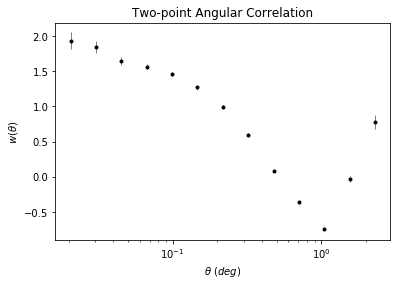

In [6]:
# PLot the results
bin_centers = 0.5 * (bins[1:] + bins[:-1])
corr = [r_corr]
corr_err = [r_corr_err]
bootstraps = [r_bootstraps]
plt.errorbar(bin_centers, corr[0], corr_err[0],fmt='.k', ecolor='gray', lw=1)
plt.xscale('log')
plt.yscale('linear')
plt.xlabel(r'$\theta\ (deg)$')
plt.ylabel(r'$w(\theta)$')
plt.title('Two-point Angular Correlation')
plt.show()